<a href="https://colab.research.google.com/github/priyanshiiguptaaa/webdverse/blob/main/ds_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***`Smart Farming with DataAnalytics`***

>Problem Statement:

Agriculture is a critical sector in India, providing livelihoods for a significant portion of the population and contributing substantially to the national economy. However, Indian agriculture faces numerous challenges, including unpredictable weather patterns, soil degradation, pest infestations, and the improper use of fertilizers and pesticides. These factors can severely impact crop yields and result in substantial economic losses for farmers.



>Proposed Solution:

 Now by making use of machine learning prediction models we create model which can predict
Crop Yield
Expected Rainfall
Crop Damage
By using several datasets



# 1. Yield prediction


From the 'Indian agriculture crop production' data set we can predict the yield of the different crops:

> Which includes following steps:

LOAD THE DATA

DATA PREPROCESSING

FEATURE EXTRACTION

MODEL DEVELOPMENT

PRINTING OUTCOMES



In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("/content/India Agriculture Crop Production.csv")

# Convert production units to tonnes
def change_units(row):
    if row['Production Units'] == 'Bales':
        return row['Production'] * 1.7
    elif row['Production Units'] == 'Nuts':
        return row['Production'] / 50
    else:
        return row['Production']

df['Production'] = df.apply(change_units, axis=1)

# Drop rows with missing 'Crop' values
df.dropna(subset=['Crop'], inplace=True)

# Filter relevant crops and keep the necessary columns
data = df[['State', 'District', 'Season', 'Area', 'Crop']]
data = data[data['Crop'].isin([
    'Rice', 'Maize', "Moong(Green Gram)", 'Urad', 'Groundnut', 'Wheat',
    'Rapeseed &Mustard', 'Sugarcane', 'Arhar/Tur', 'Potato', 'Onion', 'Gram',
    'Jowar', 'Dry Chilies', 'Bajra', "Peas & beans (Pulses)", 'Sunflower',
    'Banana', 'Coconut', 'Khesari', 'Small millets', 'Cotton(lint)', 'Masoor',
    'Turmeric', 'Barley', 'Linseed '
])]

# One-hot encode categorical variables
state = pd.get_dummies(data['State'], drop_first=True)
district = pd.get_dummies(data['District'], drop_first=True)
season = pd.get_dummies(data['Season'], drop_first=True)

# Concatenate features
new_data = pd.concat([data[['Area']], state, district, season], axis=1)

# Define features and target
X = new_data
Y = data['Crop']

# Handle missing values (if any)
if X.isna().sum().sum() > 0:
    imputer_X = SimpleImputer(strategy='mean')
    X = imputer_X.fit_transform(X)
else:
    X = X.values  # Ensure X is a numpy array for later steps

if Y.isna().sum() > 0:
    imputer_Y = SimpleImputer(strategy='most_frequent')
    Y = imputer_Y.fit_transform(Y.values.reshape(-1, 1)).ravel()
else:
    Y = Y.values  # Ensure Y is a numpy array for later steps

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=567)

# Scale features
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


Random Forest Accuracy: 0.63


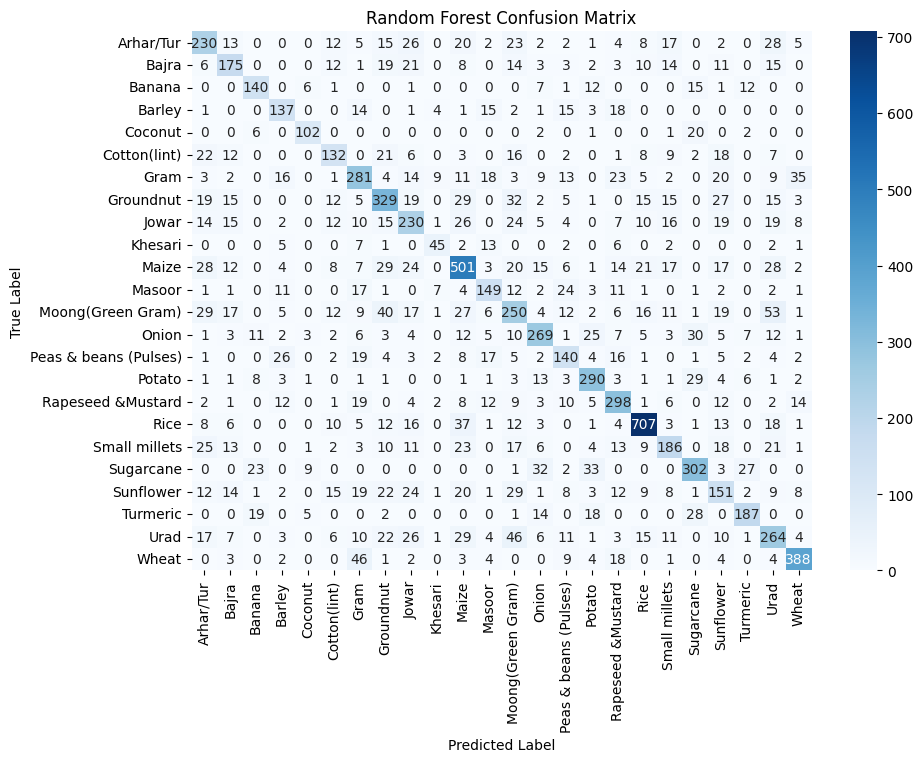

Random Forest Classification Report:
                       precision    recall  f1-score   support

            Arhar/Tur       0.55      0.55      0.55       415
                Bajra       0.56      0.55      0.56       317
               Banana       0.67      0.71      0.69       196
               Barley       0.60      0.65      0.62       212
              Coconut       0.80      0.76      0.78       134
         Cotton(lint)       0.55      0.51      0.53       259
                 Gram       0.58      0.59      0.58       478
            Groundnut       0.60      0.61      0.60       543
                Jowar       0.51      0.53      0.52       437
              Khesari       0.62      0.52      0.57        86
                Maize       0.65      0.66      0.65       757
               Masoor       0.59      0.60      0.59       250
    Moong(Green Gram)       0.47      0.46      0.47       538
                Onion       0.67      0.63      0.65       427
Peas & beans (Pul

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=567)
model_rf.fit(x_train, y_train)

# Make predictions
y_pred_rf = model_rf.predict(x_test)

# Evaluate Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=model_rf.classes_, yticklabels=model_rf.classes_)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
report_rf = classification_report(y_test, y_pred_rf, target_names=model_rf.classes_)
print("Random Forest Classification Report:")
print(report_rf)

<Figure size 1200x800 with 0 Axes>

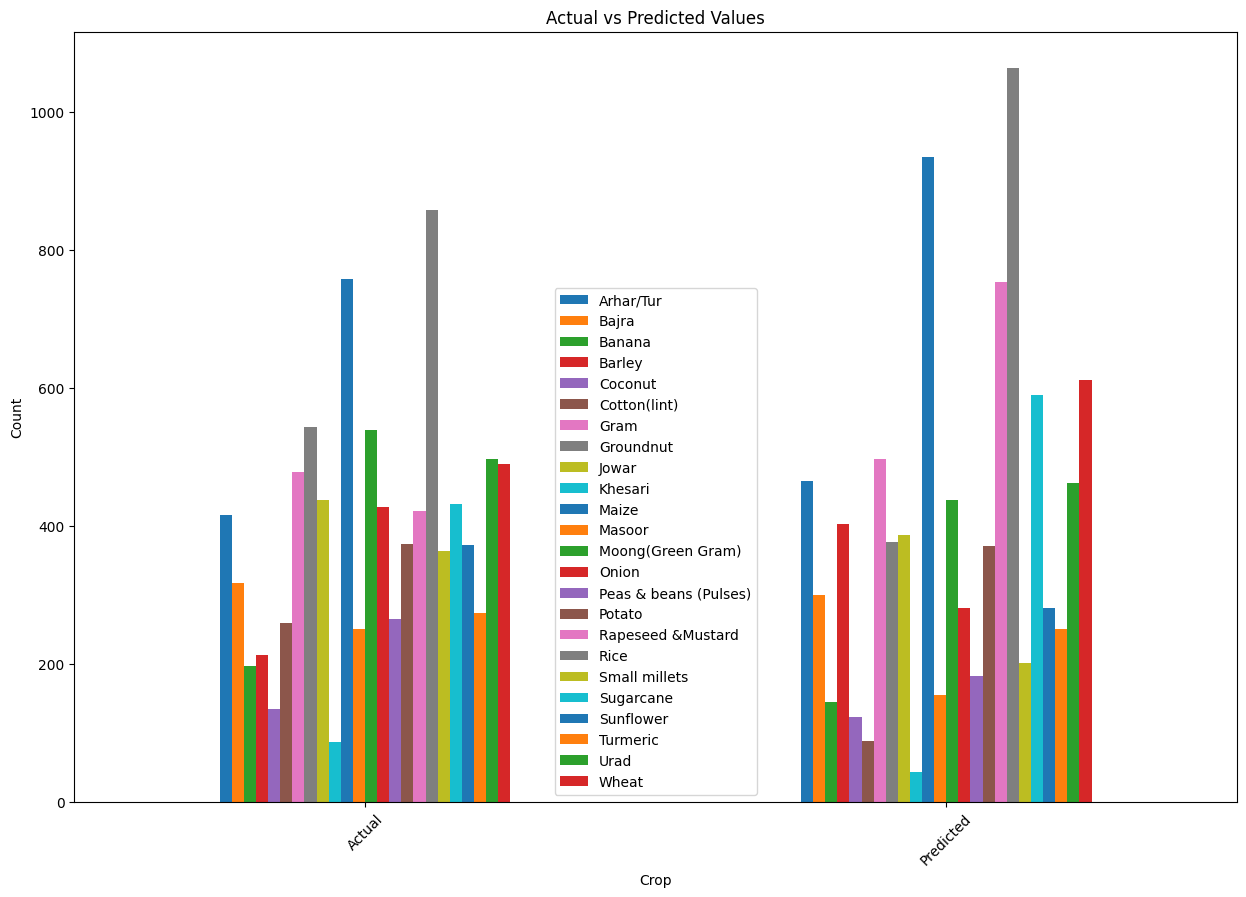

In [ ]:
plt.figure(figsize=(12, 8))
actual_vs_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
actual_vs_predicted = actual_vs_predicted.apply(pd.Series.value_counts).T.fillna(0).astype(int)
actual_vs_predicted.plot(kind='bar', figsize=(15, 10))
plt.title('Actual vs Predicted Values')
plt.xlabel('Crop')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# ***2.Rainfall Predictions***

> Using 'rainfall' and 'indian crop production' data sets
Predicting rainfall for the upcoming year



> Which includes following steps:

LOAD THE DATA

DATA PREPROCESSING

FEATURE EXTRACTION

MODEL DEVELOPMENT

PRINTING OUTCOMES






In [ ]:
import pandas as pd

# Load the crop production data
crop_data = pd.read_csv("/content/India Agriculture Crop Production.csv")

# Load the rainfall data
rainfall_data = pd.read_csv("/content/Copy of rainfall.csv")

# Rename 'Crop_Year' to 'Year' for consistency
rainfall_data.rename(columns={'Crop_Year': 'Year'}, inplace=True)


<ipython-input-6-37b4620d235e>:7: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  rainfall_data = pd.read_csv("/content/Copy of rainfall.csv")


In [ ]:
# Function to clean the Year column
def clean_year(year):
    if isinstance(year, str):
        return int(year.split('-')[0])
    return int(year)

# Clean and convert the 'Year' column in both datasets
crop_data['Year'] = crop_data['Year'].apply(clean_year)
rainfall_data['Year'] = rainfall_data['Year'].apply(clean_year)


In [ ]:
# Create a dictionary from rainfall data for easy lookup
rainfall_dict = rainfall_data.set_index('Year')['rain_in_mm'].to_dict()

# Add a new column for rainfall in the crop production data
crop_data['rain_in_mm'] = crop_data['Year'].map(rainfall_dict)

# Select relevant columns and remove duplicates and missing values
data = crop_data[['Year', 'rain_in_mm']].drop_duplicates().dropna()


In [ ]:
# Prepare features and target
X = data[['Year']]
y = data['rain_in_mm']


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=567)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=567)
model.fit(x_train, y_train)

# Predict rainfall on the test set
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 1.04
Root Mean Squared Error: 1.02
Mean Absolute Error: 0.62
R^2 Score: -0.81


In [ ]:
# Predict rainfall for the current year (e.g., 2024)
current_year = pd.DataFrame({'Year': [2024]})
predicted_rainfall = model.predict(current_year)
print(f"Predicted Rainfall for 2024: {predicted_rainfall[0]:.2f} mm")


Predicted Rainfall for 2024: 151.41 mm


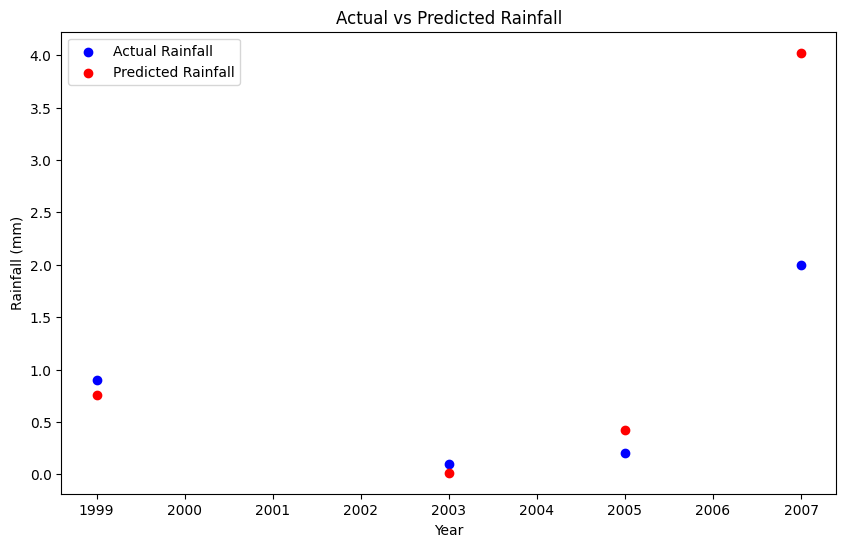

In [ ]:


import matplotlib.pyplot as plt

# Plot actual vs predicted rainfall
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='blue', label='Actual Rainfall')
plt.scatter(x_test, y_pred, color='red', label='Predicted Rainfall')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title('Actual vs Predicted Rainfall')
plt.legend()
plt.show()


# ***3. Damage Prediction***

> By adding one more dataset of chemical to the above data sets we will now predict if the crop producing will be damaged by asking certain conditions



> Which includes following steps:

LOAD THE DATA

DATA PREPROCESSING

FEATURE EXTRACTION

MODEL DEVELOPMENT

PRINTING OUTCOMES


> At last user can input the asked values and then model can predict the chances of damaged crop







In [2]:
import pandas as pd

# Load the new dataset
soil_data = pd.read_csv("/content/chemicals.csv")

# Display the first few rows to understand the data
print(soil_data.head())
# One-hot encode categorical variables, including 'soil type', 'season', 'szn', and 'item'
soil_data_encoded = pd.get_dummies(soil_data, columns=['Soil_Type', 'Season', 'Szn', 'Item'], drop_first=True)

# Check the new DataFrame after encoding
print(soil_data_encoded.head())


   Estimated_Insects_Count  Season     Soil_Type          Item  \
0                      188  Kharif      Alluvial  Insecticides   
1                      209  Kharif      Alluvial  Insecticides   
2                      257  Kharif      Alluvial  Insecticides   
3                      257  Kharif  Black-Cotton  Insecticides   
4                      342  Kharif      Alluvial  Insecticides   

   Number_Doses_Week  Number_Weeks_Used      Szn     Crop_Damage  
0                  0                  0   Summer  Minimal Damage  
1                  0                  0  Monsoon  Partial Damage  
2                  0                  0  Monsoon  Partial Damage  
3                  0                  0  Monsoon  Partial Damage  
4                  0                  0  Monsoon  Partial Damage  
   Estimated_Insects_Count  Number_Doses_Week  Number_Weeks_Used  \
0                      188                  0                  0   
1                      209                  0                  0 

In [3]:
# Define features and target
X = soil_data_encoded.drop(columns=['Crop_Damage'])
y = soil_data_encoded['Crop_Damage']


In [4]:


from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=567)


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=567)
model.fit(x_train, y_train)

# Predict crop damage on the test set
y_pred = model.predict(x_test)


Accuracy: 0.81


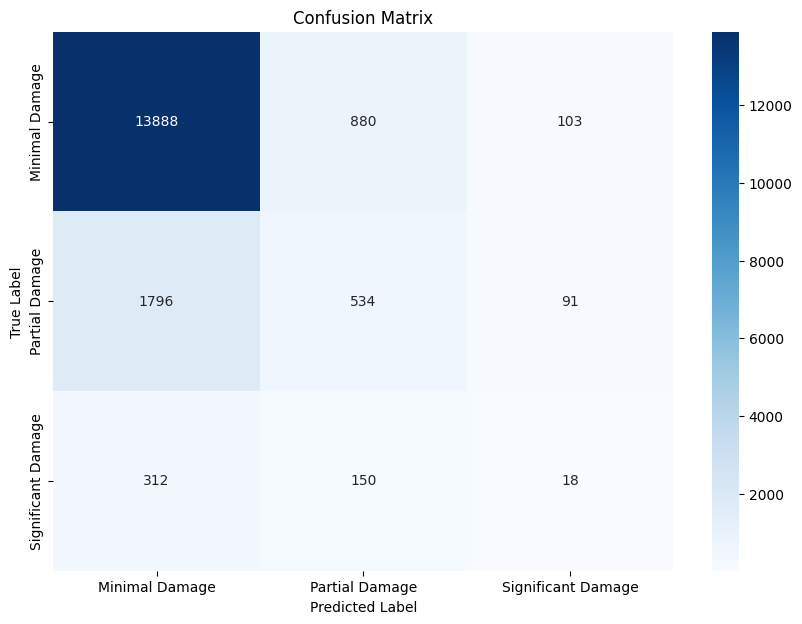

In [6]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



In [7]:
import joblib
joblib.dump(model, 'crop_damage_model.pkl')

['crop_damage_model.pkl']

In [8]:
import joblib
import pandas as pd

# Load the trained model
model = joblib.load('crop_damage_model.pkl')

# Function to get user input
def get_user_input():
    soil_type = input("Enter soil type: ")
    season = input("Enter crop season (e.g., Kharif, Rabi): ")
    szn = input("Enter season (e.g., Monsoon, Summer, Winter): ")
    item = input("Enter item used (e.g., Insecticide, Pesticide): ")
    doses = int(input("Enter number of doses: "))

    # Prepare the input DataFrame
    input_data = {
        'soil_type': [soil_type],
        'season': [season],
        'szn': [szn],
        'item': [item],
        'no_of_doses': [doses]
    }
    input_df = pd.DataFrame(input_data)

    # One-hot encode the input DataFrame
    input_encoded = pd.get_dummies(input_df, columns=['soil_type', 'season', 'szn', 'item'], drop_first=True)

    # Ensure all expected columns are present
    model_columns = model.feature_names_in_
    for col in model_columns:
        if col not in input_encoded.columns:
            input_encoded[col] = 0

    input_encoded = input_encoded[model_columns]

    return input_encoded

# Function to make prediction
def predict_crop_damage(input_data):
    prediction = model.predict(input_data)[0]
    return prediction

# Main function
if __name__ == "__main__":
    user_input = get_user_input()
    result = predict_crop_damage(user_input)
    print(f"Predicted crop damage: {result}")



Enter soil type: Alluvial
Enter crop season (e.g., Kharif, Rabi): rabi
Enter season (e.g., Monsoon, Summer, Winter): winter
Enter item used (e.g., Insecticide, Pesticide): herbicide
Enter number of doses: 2
Predicted crop damage: Partial Damage


In [10]:
from flask import Flask, request, render_template, jsonify
import joblib
import pandas as pd

app = Flask(__name__)

# Load the trained model
model = joblib.load('crop_damage_model.pkl')

# Function to prepare input data
def prepare_input_data(soil_type, season, szn, item, doses):
    input_data = {
        'soil_type': [soil_type],
        'season': [season],
        'szn': [szn],
        'item': [item],
        'no_of_doses': [doses]
    }
    input_df = pd.DataFrame(input_data)
    input_encoded = pd.get_dummies(input_df, columns=['soil_type', 'season', 'szn', 'item'], drop_first=True)

    model_columns = model.feature_names_in_
    for col in model_columns:
        if col not in input_encoded.columns:
            input_encoded[col] = 0

    input_encoded = input_encoded[model_columns]
    return input_encoded

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    soil_type = request.form['soil_type']
    season = request.form['season']
    szn = request.form['szn']
    item = request.form['item']
    doses = int(request.form['doses'])

    input_data = prepare_input_data(soil_type, season, szn, item, doses)
    prediction = model.predict(input_data)[0]

    return render_template('index.html', prediction_text=f'Predicted Crop Damage: {prediction}')

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [11]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Crop Damage Prediction</title>
    <link rel="stylesheet" href="{{ url_for('static', filename='styles.css') }}">
</head>
<body>
    <div class="container">
        <h2>Crop Damage Prediction</h2>
        <form action="/predict" method="post">
            <div class="form-group">
                <label for="soil_type">Soil Type:</label>
                <input type="text" id="soil_type" name="soil_type" required>
            </div>
            <div class="form-group">
                <label for="season">Crop Season (e.g., Kharif, Rabi):</label>
                <input type="text" id="season" name="season" required>
            </div>
            <div class="form-group">
                <label for="szn">Season (e.g., Monsoon, Summer, Winter):</label>
                <input type="text" id="szn" name="szn" required>
            </div>
            <div class="form-group">
                <label for="item">Item Used (e.g., Insecticide, Pesticide):</label>
                <input type="text" id="item" name="item" required>
            </div>
            <div class="form-group">
                <label for="doses">Number of Doses:</label>
                <input type="number" id="doses" name="doses" required>
            </div>
            <button type="submit">Predict</button>
        </form>
        {% if prediction_text %}
            <div class="result">
                <h3>{{ prediction_text }}</h3>
            </div>
        {% endif %}
    </div>
</body>
</html>


SyntaxError: invalid syntax (<ipython-input-11-6a6e004c7296>, line 1)